In [1]:
!pip install cdt pandas==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cdt.causality.pairwise import ANM, BivariateFit, CDS, GNN, IGCI, Jarfo, NCC, RCC, RECI

from sklearn.metrics import accuracy_score

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [3]:
simple_pairwise = [ANM, BivariateFit, CDS, IGCI]
ml_pairwise = [Jarfo, NCC, RCC]

In [4]:
def load_train_set(path):
    df = pd.read_pickle(path)
    y = df['target'].values
    X = df.drop(['target'], axis=1)
    return X, y

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
datapath = "/content/drive/MyDrive/Competition data"

In [7]:
X_linear_train, y_linear_train = load_train_set(datapath + '/public_data/linear_train.pkl')
X_linear_test = pd.read_pickle(datapath + '/public_data/linear_test.pkl')
y_linear_test = pd.read_csv(datapath + '/reference_data/linear_test.csv')

X_polynomial_train, y_polynomial_train = load_train_set(datapath + '/public_data/polynomial_train.pkl')
X_polynomial_test = pd.read_pickle(datapath + '/public_data/polynomial_test.pkl')
y_polynomial_test = pd.read_csv(datapath + '/reference_data/polynomial_test.csv')

X_sigmoid_add_train, y_sigmoid_add_train = load_train_set(datapath + '/public_data/sigmoid_add_train.pkl')
X_sigmoid_add_test = pd.read_pickle(datapath + '/public_data/sigmoid_add_test.pkl')
y_sigmoid_add_test = pd.read_csv(datapath + '/reference_data/sigmoid_add_test.csv')

X_sigmoid_mix_train, y_sigmoid_mix_train = load_train_set(datapath + '/public_data/sigmoid_mix_train.pkl')
X_sigmoid_mix_test = pd.read_pickle(datapath + '/public_data/sigmoid_mix_test.pkl')
y_sigmoid_mix_test = pd.read_csv(datapath + '/reference_data/sigmoid_mix_test.csv')

In [8]:
def show_data(dataset, y):
  fig, axs = plt.subplots(ncols=5)
  fig.set_figheight(8)
  fig.set_figwidth(9*5)
  for i in range(5):
    data = pd.DataFrame()
    data["A"] = dataset.iloc[i]["A"]
    data["B"] = dataset.iloc[i]["B"]
    if y.iloc[i][0] == 1:
      sns.scatterplot(data=data, x="A", y="B", ax=axs[i])
    else:
      sns.scatterplot(data=data, x="B", y="A", ax=axs[i])
  plt.show()

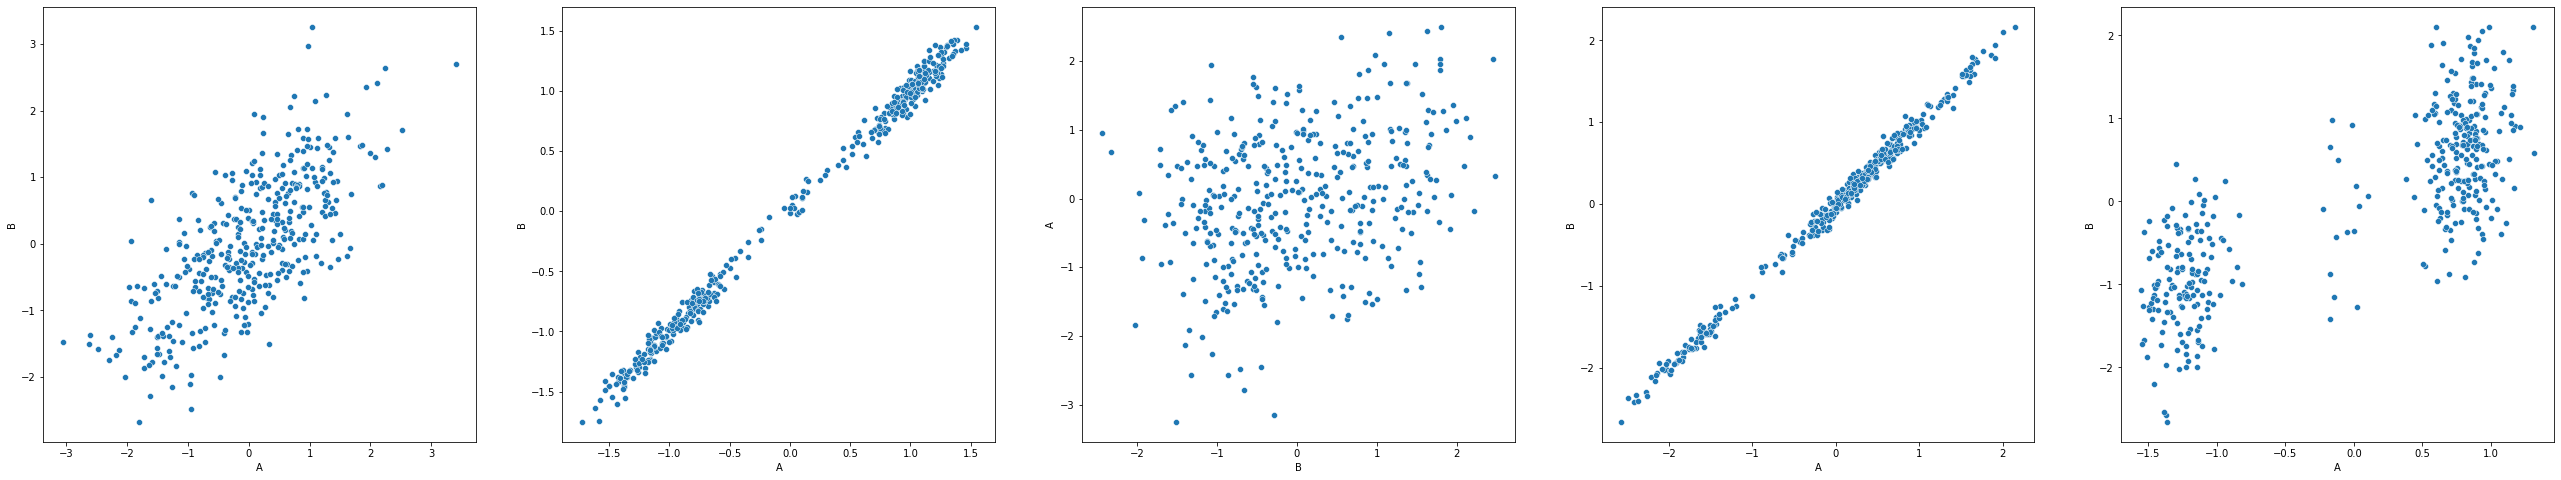

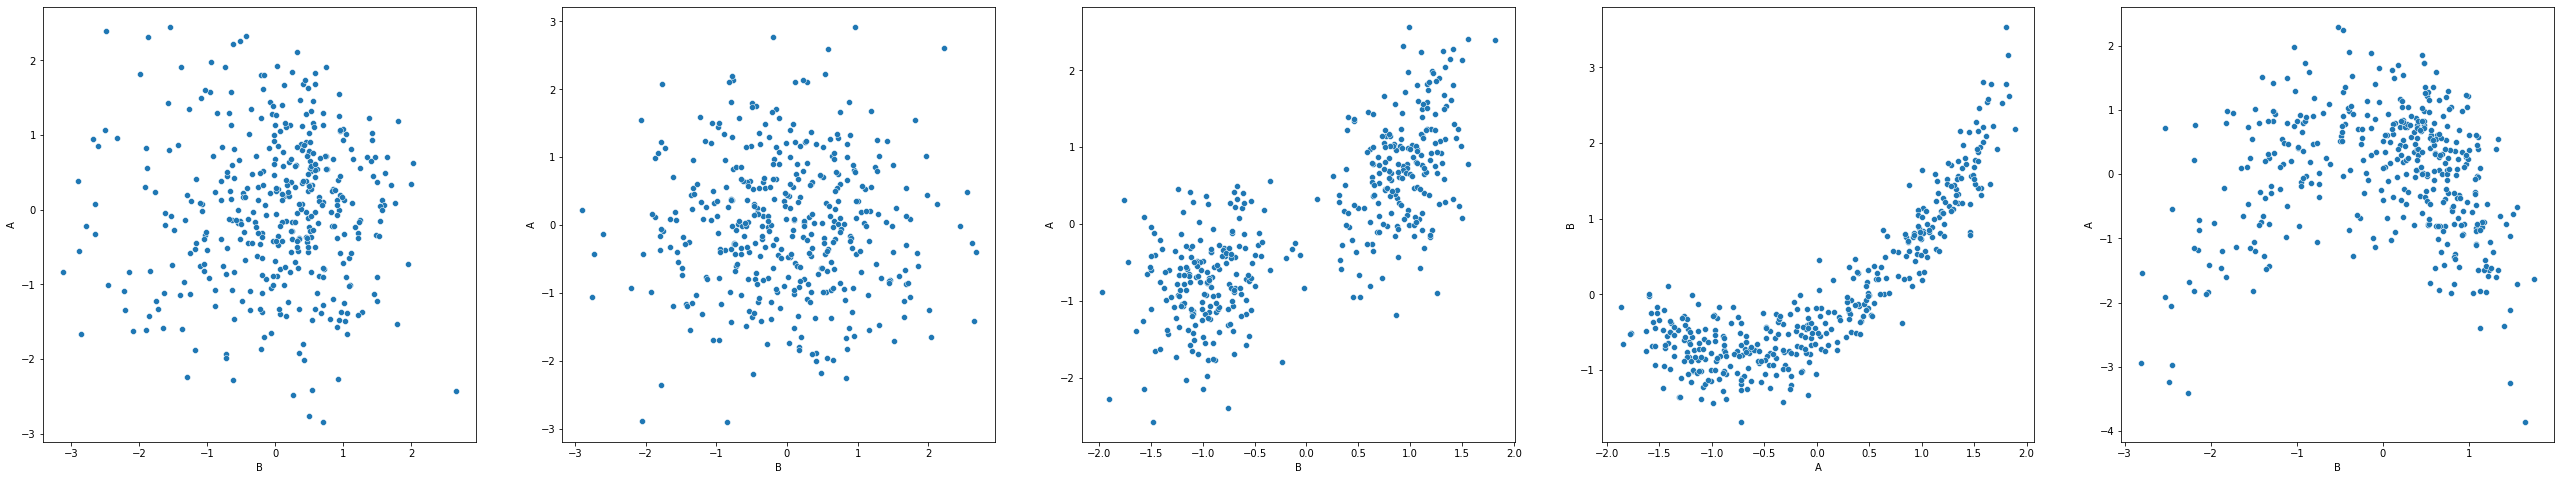

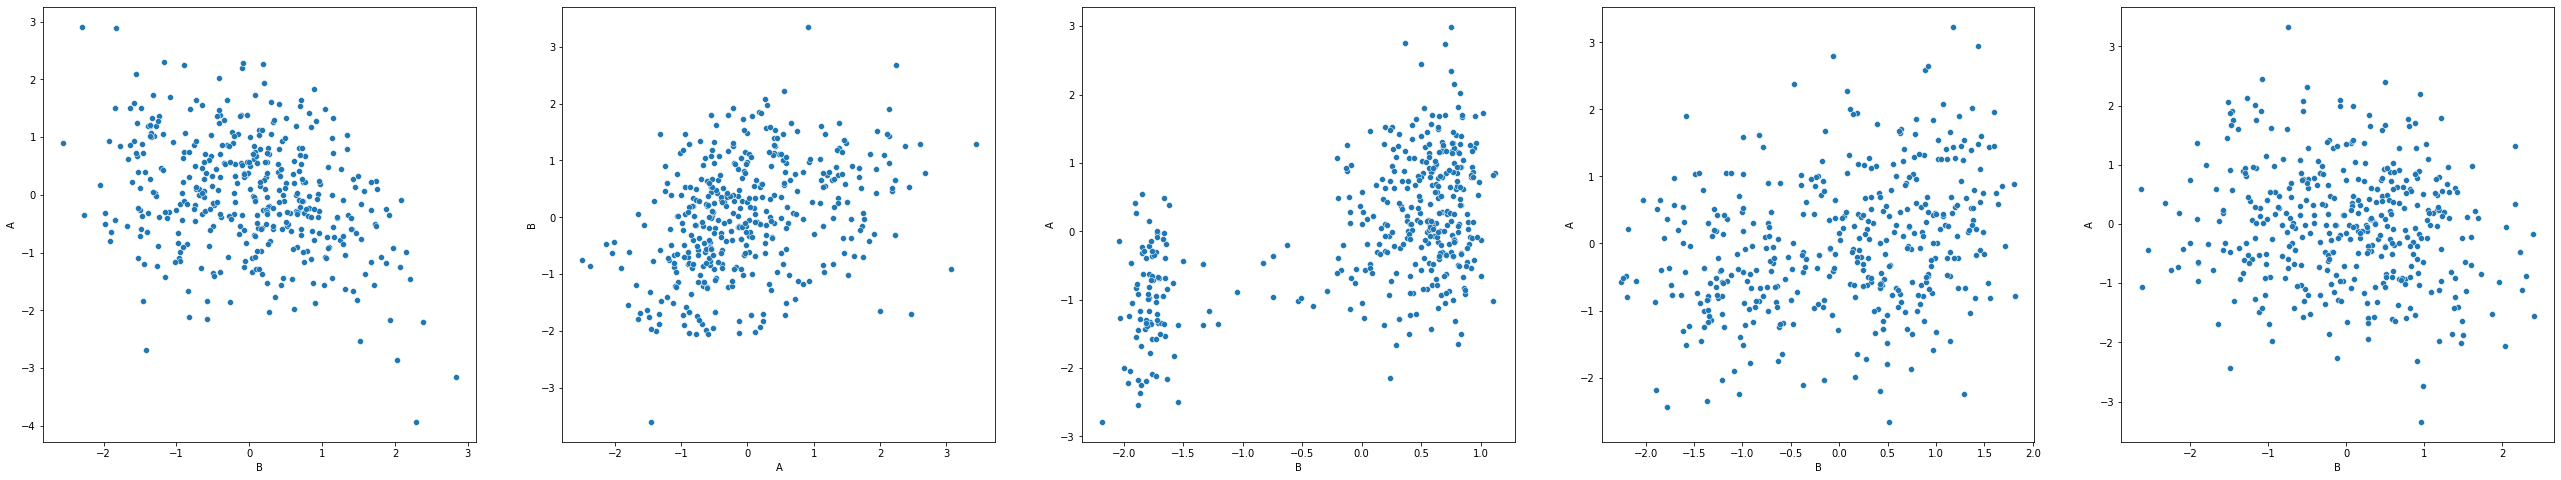

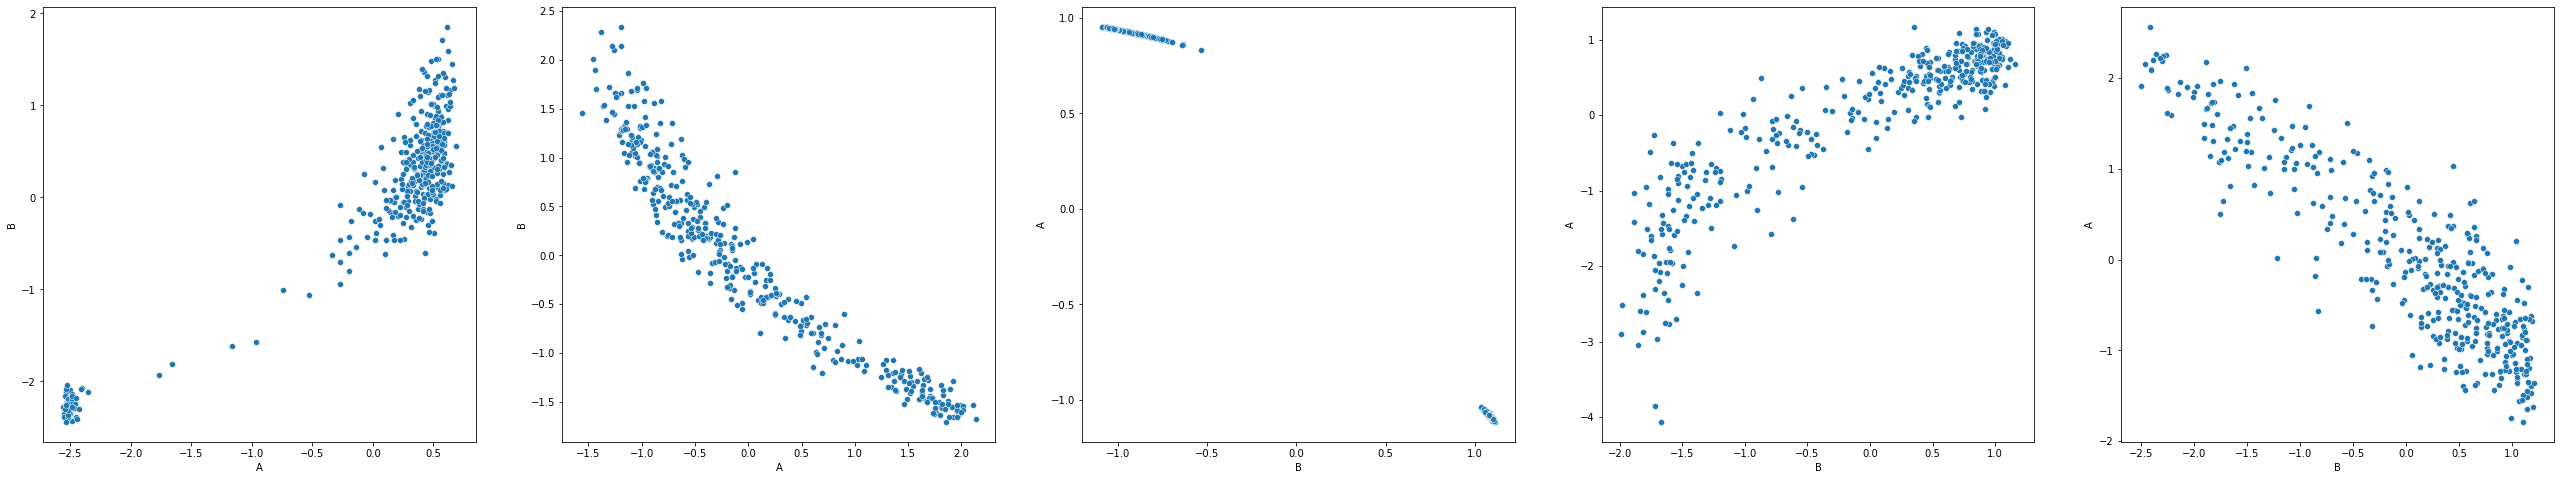

In [9]:
show_data(X_linear_test, y_linear_test)
show_data(X_polynomial_test, y_polynomial_test)
show_data(X_sigmoid_add_test, y_sigmoid_add_test)
show_data(X_sigmoid_mix_test, y_sigmoid_mix_test)

In [ ]:
pd.__version__

'1.5.0'

In [ ]:
simple_results = pd.DataFrame(columns=["linear", "polynomial", "sigmoid_add", "sigmoid_mix"], index=[x.__name__ for x in simple_pairwise])

In [ ]:
simple_results

,linear,polynomial,sigmoid_add,sigmoid_mix
ANM,NaN,NaN,NaN,NaN
BivariateFit,NaN,NaN,NaN,NaN
CDS,NaN,NaN,NaN,NaN
IGCI,NaN,NaN,NaN,NaN


In [ ]:
datasets_tests = [(X_linear_test, y_linear_test),
                  (X_polynomial_test, y_polynomial_test),
                  (X_sigmoid_add_test, y_sigmoid_add_test),
                  (X_sigmoid_mix_test, y_sigmoid_mix_test)
]

In [2]:
import pandas as pd

df = pd.DataFrame(columns=["linear", "polynomial", "sigmoid_add", "sigmoid_mix"], index=["A", "B", "C", "D"])
df

,linear,polynomial,sigmoid_add,sigmoid_mix
A,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN


In [4]:
df.iloc[0][2] = -1
df

,linear,polynomial,sigmoid_add,sigmoid_mix
A,NaN,NaN,-1,NaN
B,NaN,NaN,NaN,NaN
C,1,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN


In [ ]:
for i, model in enumerate(simple_pairwise):
    for j, (X, y) in enumerate(datasets_tests):
      m = model()
      print(model.__name__, j)
      preds = np.sign(m.predict(X))
      acc = accuracy_score(preds, y)
      simple_results.iloc[i][j] = acc

#exec time on colab: 24m49

ANM 0
ANM 1
ANM 2
ANM 3
BivariateFit 0
BivariateFit 1
BivariateFit 2
BivariateFit 3
CDS 0
CDS 1
CDS 2
CDS 3
IGCI 0
IGCI 1
IGCI 2
IGCI 3


In [ ]:
simple_results

,linear,polynomial,sigmoid_add,sigmoid_mix
ANM,0.706667,0.718667,0.809333,0.425333
BivariateFit,0.232667,0.63,0.624,0.193333
CDS,0.734,0.703333,0.745333,0.542
IGCI,0.228,0.365333,0.361333,0.214667


In [ ]:
ml_results = pd.DataFrame(columns=["linear", "polynomial", "sigmoid_add", "sigmoid_mix"], index=[x.__name__ for x in ml_pairwise])

In [ ]:
ml_results

,linear,polynomial,sigmoid_add,sigmoid_mix
Jarfo,NaN,NaN,NaN,NaN
NCC,NaN,NaN,NaN,NaN
RCC,NaN,NaN,NaN,NaN


In [ ]:
datasets_train = [(X_linear_train, y_linear_train),
                  (X_polynomial_train, y_polynomial_train),
                  (X_sigmoid_add_train, y_sigmoid_add_train),
                  (X_sigmoid_mix_train, y_sigmoid_mix_train)
]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for i, model in enumerate(ml_pairwise):
    for j, (X_test, y_test) in enumerate(datasets_tests):
      m = model()
      print(model.__name__, j)
      X_train, y_train = datasets_train[j]
      m.fit(X_train, pd.DataFrame(y_train))
      preds = np.sign(m.predict(X_test))
      acc = accuracy_score(preds, y_test)
      ml_results.iloc[i][j] = acc

#exec time on colab: 1h

Jarfo 0
Reading in training data -f
Extracting features
Training model with optimal weights
Jarfo 1
Reading in training data -f
Extracting features
Training model with optimal weights
Jarfo 2
Reading in training data -f
Extracting features
Training model with optimal weights
Jarfo 3
Reading in training data -f
Extracting features
Training model with optimal weights
NCC 0


100%|█████████▉| 1499/1500 [00:00<00:00, 1566.77it/s]


NCC 1


100%|█████████▉| 1499/1500 [00:00<00:00, 2023.58it/s]


NCC 2


100%|█████████▉| 1499/1500 [00:00<00:00, 2154.11it/s]


NCC 3


100%|█████████▉| 1499/1500 [00:00<00:00, 2079.53it/s]


RCC 0
RCC 1
RCC 2
RCC 3


In [ ]:
ml_results

,linear,polynomial,sigmoid_add,sigmoid_mix
Jarfo,0.507333,0.491333,0.54,0.559333
NCC,0.924,0.854667,0.937333,0.924
RCC,0.865333,0.753333,0.776667,0.872
